In [6]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import csv
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

connection = sql.connect("HeartCondition.db")
cursor = connection.cursor()

# A connection will be created in case it doesn't exist

conn = sqlite3.connect('HeartCondition.db') 

# Create a cursor object to execute SQL commands
cursor = connection.cursor()


# Read the CSV file into a pandas DataFrame
df = pd.read_csv("C:\\Users\Swazi.Modibe\Desktop\ITDAA4 Project\heart.csv", header=0, sep=';')

# Load the data from the DataFrame into the SQLite database
df.to_sql('Condition', conn, if_exists='replace', index=False)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# Data preparation including weeding out duplicates and missing (Null) values

#Check for duplicates, remove if they exist.
print("Duplicated: ", df.duplicated().sum())

df.drop_duplicates(inplace=True)

# Search for missing values in a data frame
print("Null: ", df.isnull().sum())
for column in df.columns:
    # Use mean if numeric or mode if nonnumeric 
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
 
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

Duplicated:  1
Null:  age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


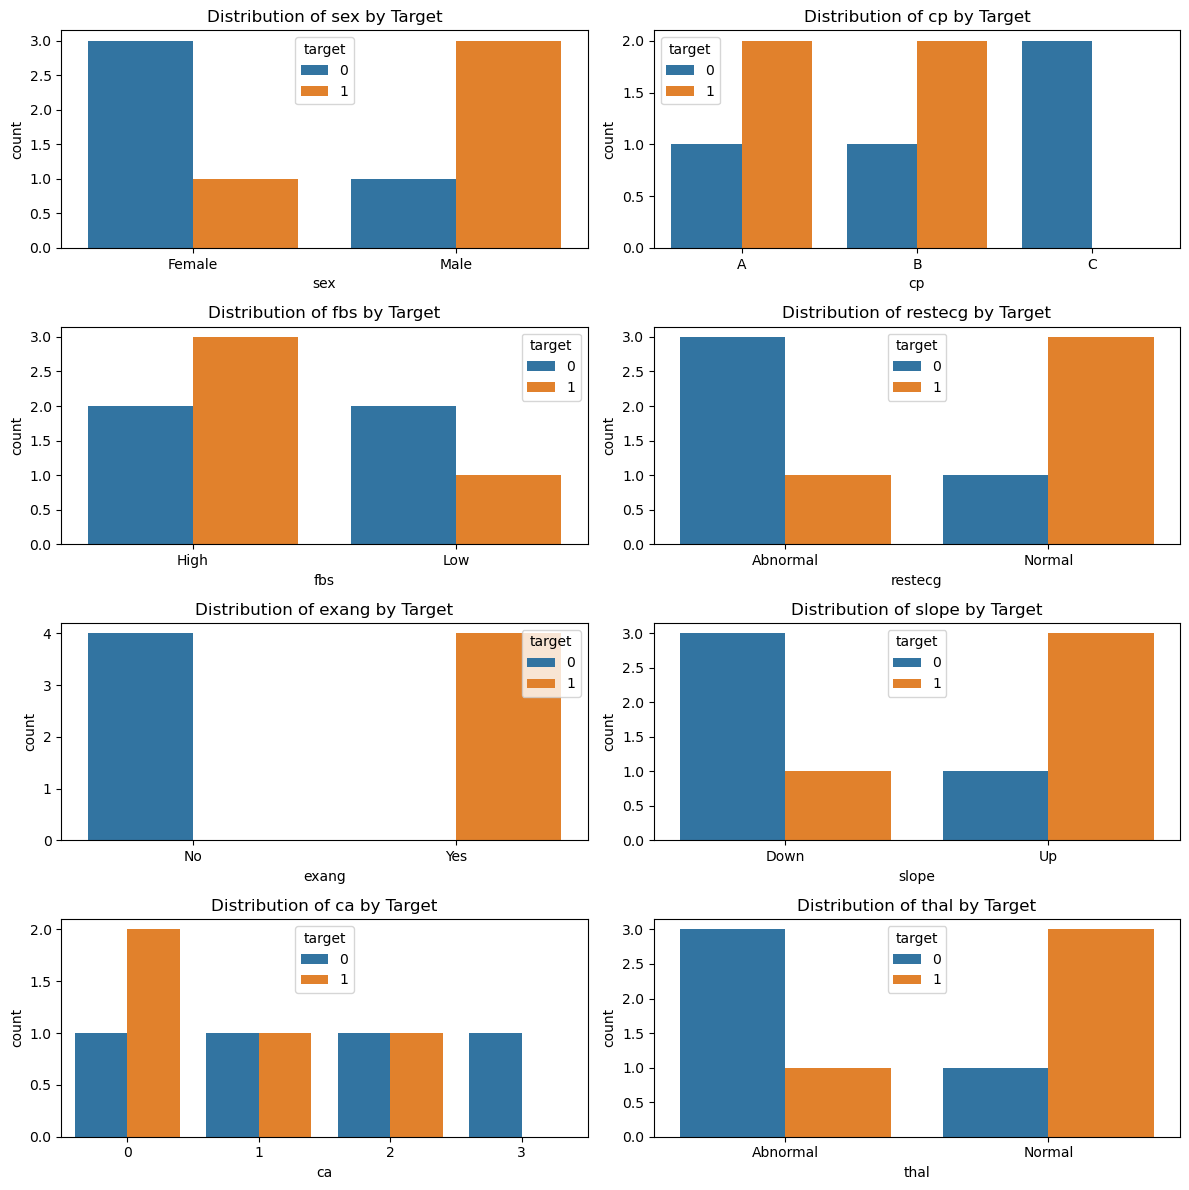

In [8]:
#Plot graphical representation on attributes in heart.csv data frame

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'sex': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'cp': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B'],
    'fbs': ['High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High'],
    'restecg': ['Normal', 'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Abnormal'],
    'exang': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'],
    'slope': ['Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down'],
    'ca': ['0', '1', '0', '2', '1', '0', '3', '2'],
    'thal': ['Normal', 'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Abnormal'],
    'target': [1, 0, 1, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)


categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for var in categorical_variables:
    df[var] = df[var].astype('category')


df['target'] = df['target'].astype('category')


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))


for i, var in enumerate(categorical_variables):
    row = i // 2
    col = i % 2
    sns.countplot(x=var, hue='target', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var} by Target')

plt.tight_layout()
plt.show()

     age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope ca  \
0     63   1  3       145   233   1       0      150     0      2.3     0  0   
1     37   1  2       130   250   0       1      187     0      3.5     0  0   
2     41   0  1       130   204   0       0      172     0      1.4     2  0   
3     56   1  1       120   236   0       1      178     0      0.8     2  0   
4     57   0  0       120   354   0       1      163     1      0.6     2  0   
..   ...  .. ..       ...   ...  ..     ...      ...   ...      ...   ... ..   
298   57   0  0       140   241   0       1      123     1      0.2     1  0   
299   45   1  3       110   264   0       1      132     0      1.2     1  0   
300   68   1  0       144   193   1       1      141     0      3.4     1  2   
301   57   1  0       130   131   0       1      115     1      1.2     1  1   
302   57   0  1       130   236   0       0      174     0      0.0     1  1   

    thal  target  
0      1       1  
1

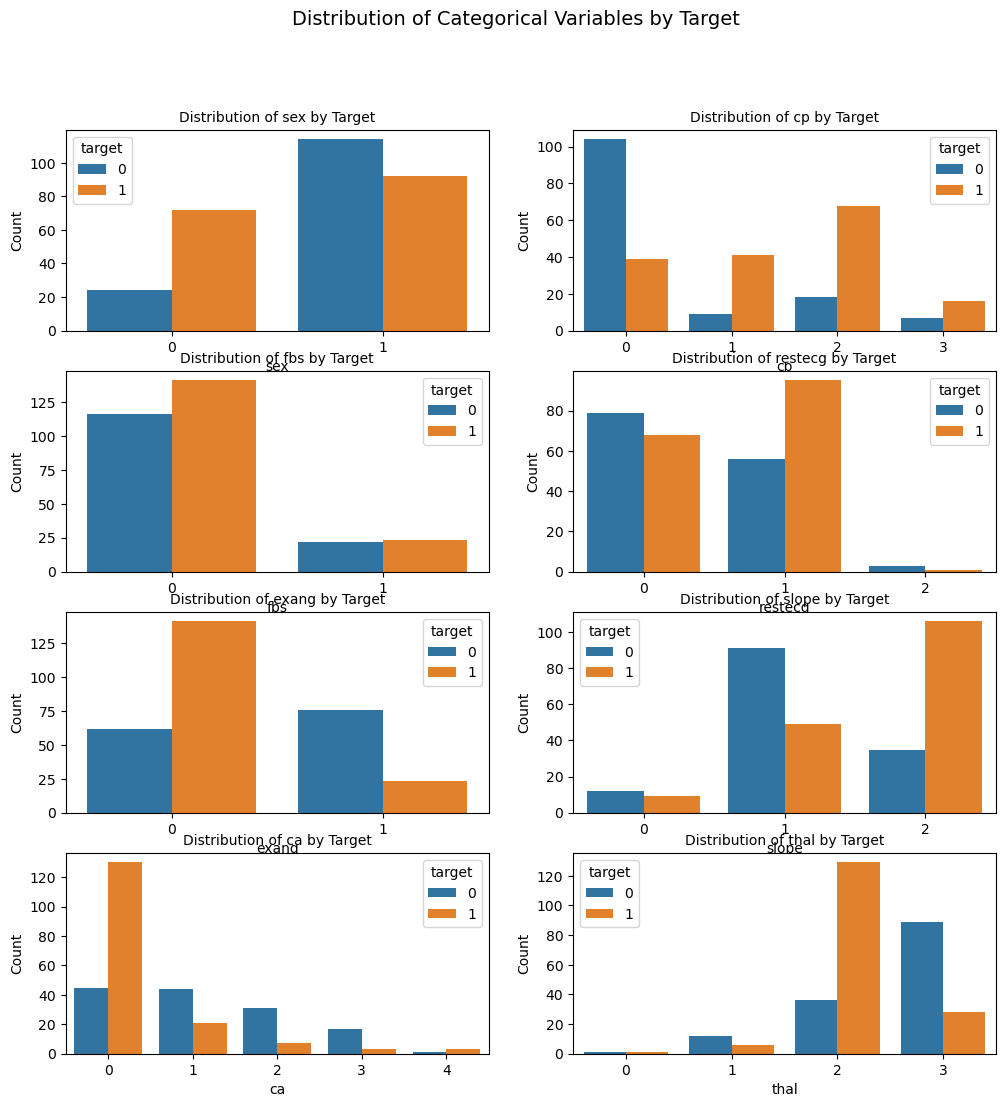

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for var in categorical_variables:
    if str(df[var].dtype) != 'category':  
        df[var] = df[var].astype('category') 


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
fig.suptitle('Distribution of Categorical Variables by Target', fontsize=14)

# Plot the distributions for each categorical variable
for i, var in enumerate(categorical_variables):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index
    sns.countplot(x=var, hue='target', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var} by Target', fontsize=10)
    axes[row, col].set_xlabel(var, fontsize=10)  # Optional: Adjust x-axis label
    axes[row, col].set_ylabel('Count', fontsize=10) # Optional: Adjust y-axis label
    print(df)


In [12]:
import pandas as pd

#Using prepared data
data = {
    'age': [63, 37, 41, 56, 57],
    'sex': [1, 1, 0, 1, 0],
   
    'target': [1, 0, 1, 1, 0]  
}

prepared = pd.DataFrame(data)
prepared

,age,sex,target
0,63,1,1
1,37,1,0
2,41,0,1
3,56,1,1
4,57,0,0


In [9]:
#Training Models
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming heart_data_cleaned is your preprocessed DataFrame
X = prepared.drop('target', axis=1)
y = prepared['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
numeric_transformer = StandardScaler()

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create and train the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

model.fit(X_train, y_train)

# Save the model
model_filename = r"C:\\Users\Swazi.Modibe\Desktop\ITDAA4 Project\heart.csv"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

NameError: name 'prepared' is not defined

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the data
file_path = r"C:\\Users\Swazi.Modibe\Desktop\ITDAA4 Project\heart.csv"
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Identify features and target
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical features (scaling and imputing missing values)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features (encoding and imputing missing values)
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Display the shape of the preprocessed data
print("Shape of preprocessed training data:", X_train_preprocessed.shape)
print("Shape of preprocessed testing data:", X_test_preprocessed.shape)


First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Shape of preprocessed training data: (242, 13)
Shape of preprocessed testing data: (61, 13)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Load the data
file_path = r"C:\\Users\Swazi.Modibe\Desktop\ITDAA4 Project\heart.csv"
data = pd.read_csv(file_path, delimiter=';')

# Identify features and target
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical features (scaling and imputing missing values)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features (encoding and imputing missing values)
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipelines for each model
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Fit and evaluate each model
pipelines = [log_reg_pipeline, rf_pipeline, svm_pipeline]
model_names = ['Logistic Regression', 'Random Forest', 'SVM']
best_model = None
best_accuracy = 0

for model, name in zip(pipelines, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Save the best model to disk
joblib.dump(best_model, 'best_model.pkl')
print(f'Best model saved: {best_model.steps[-1][0]} with accuracy {best_accuracy:.4f}')


Logistic Regression Accuracy: 0.8525
Random Forest Accuracy: 0.8361
SVM Accuracy: 0.8689
Best model saved: classifier with accuracy 0.8689


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Load the data
file_path = r"C:\\Users\Swazi.Modibe\Desktop\ITDAA4 Project\heart.csv"
data = pd.read_csv(file_path, delimiter=';')

# Identify features and target
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical features (scaling and imputing missing values)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features (encoding and imputing missing values)
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and the SVM model
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.4f}')

# Save the model to disk
model_save_path =  'C:\Users\Swazi.Modibe\anaconda3\Lib\site-packages\streamlit\best_model.pkl'
joblib.dump(svm_pipeline, model_save_path)
print(f'Model saved to {model_save_path}')


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2497366371.py, line 58)